Deep Learning (Derin Öğrenme)

https://en.wikipedia.org/wiki/Deep_learning

https://en.wikipedia.org/wiki/Artificial_neural_network

https://keras.io/examples/

https://en.wikipedia.org/wiki/GPT-3

https://livebook.manning.com/book/deep-learning-with-python-second-edition/chapter-1/


In [1]:
# MNIST veriseti https://en.wikipedia.org/wiki/MNIST_database

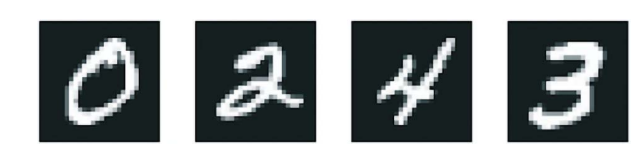

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape # 60000 eğitim resimi, 28x28 pixes

(60000, 28, 28)

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
import matplotlib.pyplot as plt

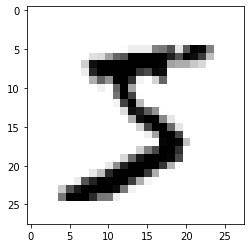

In [8]:
rakam = train_images[0] # ilk resim (0 index)
plt.imshow(rakam, cmap=plt.cm.binary)
plt.show()

In [10]:
train_labels[0]

5

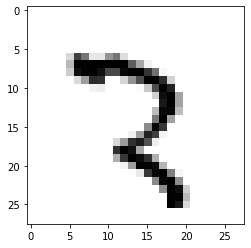

In [12]:
rakam = train_images[500] # ilk resim (0 index)
plt.imshow(rakam, cmap=plt.cm.binary)
plt.show()

In [13]:
train_labels[500]

3

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
# Deep Learning Network
from tensorflow import keras 
from tensorflow.keras import layers

In [17]:
# model oluşturma
model = keras.Sequential([
    layers.Dense(512, activation="relu"), # https://keras.io/api/layers/activations/
    layers.Dense(10, activation="softmax") # Çok sınıflı hedef değişkeni olan modeller için "softmax"
])

In [18]:
# compile
model.compile(
    optimizer="adam", # https://keras.io/api/optimizers/
    loss = "sparse_categorical_crossentropy", # https://keras.io/api/losses/
    metrics = ["accuracy"]
)

In [19]:
train_images.shape

(60000, 28, 28)

In [20]:
train_images[0].shape

(28, 28)

In [37]:
# train_images[0].reshape(28 * 28)

In [22]:
# input veri transformasyonu
train_images = train_images.reshape(60000, 28 * 28)
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape(10000, 28 * 28)
test_images = test_images.astype("float32") / 255

In [23]:
train_images.shape

(60000, 784)

In [24]:
# model fit
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.2683 - accuracy: 0.9232
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1078 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0698 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0510 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0376 - accuracy: 0.9893


In [25]:
# Model başarısı?
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0662 - accuracy: 0.9800


In [26]:
print(f"test doğruluk oranı: {test_acc}")

test doğruluk oranı: 0.9800000190734863


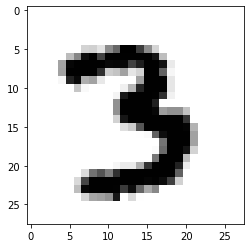

In [28]:
rakam = test_images[500].reshape(28,28) # 
plt.imshow(rakam, cmap=plt.cm.binary)
plt.show()

In [34]:
tahminler = model.predict(test_images[500:501]) # index=500

In [35]:
print(tahminler[0])

[8.8760840e-14 2.9892136e-10 1.3199436e-07 9.9999893e-01 5.0896960e-13
 2.2422588e-09 6.2660473e-17 6.1089034e-10 1.2595434e-09 9.6598387e-07]


In [36]:
tahminler[0].argmax() # array'de bulunan maksimum değerin index numarası

3

SINIFLANDIRMA: IMDB FİLM YORUMLARI

In [1]:
# Veri seti
from tensorflow.keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [40]:
train_labels[0]

1

In [2]:
max([max(sequence) for sequence in train_data])

9999

In [47]:
len(train_data[100])

158

In [3]:
train_data.shape

(25000,)

In [ ]:
# Multi-hot encoding

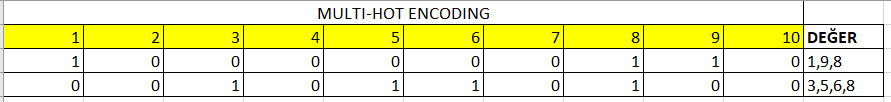

In [4]:
import numpy as np

def seri_vektorizasyonu(seri, boyut=10000):
  sonuclar = np.zeros((len(seri),boyut))
  for i, degerler in enumerate(seri):
    for j in degerler:
      sonuclar[i,j] = 1.
  return sonuclar

In [5]:
x_train = seri_vektorizasyonu(train_data)
x_test = seri_vektorizasyonu(test_data)

In [6]:
x_train.shape

(25000, 10000)

In [7]:
# Etiketlerin vektorizasyonu
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
y_train.shape

(25000,)

In [57]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [9]:
# Modelin oluşturulması
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [11]:
# compile
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy", # hedef değişkenleri 2 tane ise 0-1 gibi
              metrics = ["accuracy"]
)

In [12]:
# Eğitim seti de 2'ye ayrılmalı eğitim + validasyon(doğrulama)
x_val = x_train[:10000] # ilk 10000 değer => validasyon olarak ayır
x_egitim = x_train[10000:] # diğer değerler => eğitim seti
y_val = y_train[:10000]
y_egitim = y_train[10000:]

In [16]:
y_val.shape

(10000,)

In [17]:
# train model
history = model.fit(x_egitim,
                    y_egitim,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5161 - accuracy: 0.7921 - val_loss: 0.3897 - val_accuracy: 0.8698
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3109 - accuracy: 0.9001 - val_loss: 0.3071 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2278 - accuracy: 0.9255 - val_loss: 0.2969 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1813 - accuracy: 0.9401 - val_loss: 0.2788 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1475 - accuracy: 0.9531 - val_loss: 0.2762 - val_accuracy: 0.8919
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1213 - accuracy: 0.9624 - val_loss: 0.2913 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0999 - accuracy: 0.9707 - val_loss: 0.3790 - val_accuracy: 0.8636
Epoch 8/20
30

In [18]:
import matplotlib.pyplot as plt

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

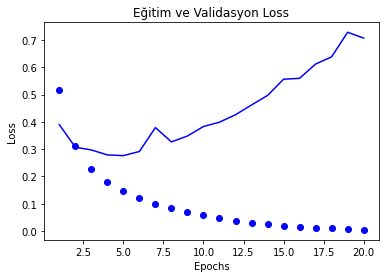

In [21]:
# Loss
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Eğitim Loss")
plt.plot(epochs, val_loss_values, "b", label="Validasyon Loss")
plt.title("Eğitim ve Validasyon Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [22]:
# optimum epochs = 4 (grafikten çıkan sonuc)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy", # hedef değişkenleri 2 tane ise 0-1 gibi
              metrics = ["accuracy"]
)

# train model
history = model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4540 - accuracy: 0.8140
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2576 - accuracy: 0.9090
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1986 - accuracy: 0.9292
Epoch 4/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1649 - accuracy: 0.9411


In [23]:
# test verisi ile model performansı
sonuclar = model.evaluate(x_test, y_test)
print(sonuclar)

782/782 [==============================] - 2s 3ms/step - loss: 0.2931 - accuracy: 0.8830
[0.2930905222892761, 0.8830400109291077]
